In [2]:
import numpy as np
import scipy as sp
from numpy import linalg as nla
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors

In [3]:
k=0.4032
c=2.3952
p=0.3224
d=0.225423
def model(r,tc):
    x=r[0]
    y=r[1]
    z=r[2]
    a=7.3939+0.002*np.sin(1.8*tc)
    x1=1.0*(p*d*(x*x-a*x)+x*(x+y+c-c*np.tanh(x+z)))
    y1=-1.0*p*d*(a*y+x*x)
    z1=d*(k-z-0.5*x)
    return (np.array([x1,y1,z1]))

In [4]:
def jac(r,tc):
    x=r[0]
    y=r[1]
    z=r[2]
    M=np.array([[-c*np.tanh(x + z) + c + d*p*((-7.3939+0.002*np.sin(1.8*tc)) + 2*x) + x*(-c*(1 - np.tanh(x + z)**2) + 1) + x + y,x,-c*x*(1 - np.tanh(x + z)**2)],
                [-2*x*p*d,-p*d*(7.3939+0.002*np.sin(1.8*tc)),0],
                [-d*0.5,0,-d]])
    return M

In [5]:
def mul(r,tc,g):
    res=np.matmul(jac(r,tc),g)
    return res

In [6]:
nerr=100

In [7]:
t1t=87.15
tmax1t=t1t+10
ht=0.001
x1t=-2.4632393636886345
y1t=-0.8278899266995253
z1t=1.6432010227294602
r1t=np.array([x1t,y1t,z1t])
valx1t=[x1t]
valy1t=[y1t]
valz1t=[z1t]
h0t=0
valh1t=[h0t]
while (t1t<tmax1t):
    tct=t1t
    k1t=model(r1t,tct)
    k2t=model(r1t+0.5*ht*k1t,tct)
    k3t=model(r1t+0.5*ht*k2t,tct)
    k4t=model(r1t+k3t*ht,tct)
    
    r1t=r1t+(1.0/6)*ht*(k1t+2*k2t+2*k3t+k4t)
    valx1t.append(r1t[0])
    valy1t.append(r1t[1])
    valz1t.append(r1t[2])
    h0t=h0t+ht
    valh1t.append(h0t)
    t1t=t1t+ht

result1x=[]
result1y=[]
result1z=[]
for i in range(nerr):
    t1=87.15
    h=0.001
    h0=0
    valh1=[h0]
    tmax1=t1+10
    x1=-2.4632393636886345
    y1=-0.8278899266995253
    z1=1.6432010227294602
   
    xi1=x1+np.random.uniform(-1e-8,1e-8)
    yi1=y1+np.random.uniform(-1e-8,1e-8)
    zi1=z1+np.random.uniform(-1e-8,1e-8)
    valx1=[xi1]
    valy1=[yi1]
    valz1=[zi1]
    r1=np.array([xi1,yi1,zi1])
    while (t1<tmax1):
        
        tc=t1
        k1=model(r1,tc)
        k2=model(r1+0.5*h*k1,tc)
        k3=model(r1+0.5*h*k2,tc)
        k4=model(r1+k3*h,tc)
    
        r1=r1+(1.0/6)*h*(k1+2*k2+2*k3+k4)
        valx1.append(r1[0])
        valy1.append(r1[1])
        valz1.append(r1[2])
        h0=h0+h
        valh1.append(h0)
        t1=t1+h
    
    result1x.append(valx1)
    result1y.append(valy1)
    result1z.append(valz1)
    
arrayerr1=np.zeros(len(result1x[1]))
for t in range (len(result1x[0])):
    toterr=0
    for i in range (nerr):
        errsq=(valx1t[t]-result1x[i][t])**2+(valy1t[t]-result1y[i][t])**2+(valz1t[t]-result1z[i][t])**2
        toterr=toterr+errsq
    sqrt=np.sqrt(toterr/nerr)
    arrayerr1[t]=sqrt

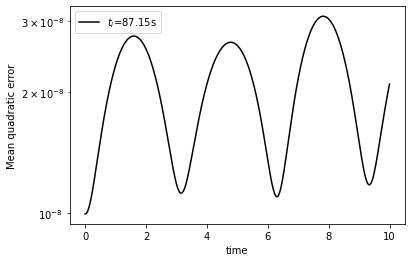

In [8]:
fig1 = plt.figure()
ax = fig1.add_subplot(1, 1, 1)
plt.plot(valh1t,arrayerr1,'k',label='$t_i$=87.15s')
plt.xlabel('time')
plt.ylabel('Mean quadratic error')
ax.set_yscale('log')
plt.legend()

plt.show()


In [9]:
h=0.001
t2=156.62
tmax2=t2+10
x2=-2.3114547224366344
y2=-0.7654090862603016
z2=1.6184734318881504
r2t=np.array([x2,y2,z2])
valx2t=[x2]
valy2t=[y2]
valz2t=[z2]
h0=0
valh=[h0]
while (t2<tmax2):
    tc=t2
    k1=model(r2t,tc)
    k2=model(r2t+0.5*h*k1,tc)
    k3=model(r2t+0.5*h*k2,tc)
    k4=model(r2t+k3*h,tc)
    
    r2t=r2t+(1.0/6)*h*(k1+2*k2+2*k3+k4)
    valx2t.append(r2t[0])
    valy2t.append(r2t[1])
    valz2t.append(r2t[2])
    h0=h0+h
    valh.append(h0)
    t2=t2+h

result2x=[]
result2y=[]
result2z=[]
for i in range(nerr):
    t2=156.62
    tmax2=t2+10
    xi2=x2+np.random.uniform(-1e-8,1e-8)
    yi2=y2+np.random.uniform(-1e-8,1e-8)
    zi2=z2+np.random.uniform(-1e-8,1e-8)
    valx2=[xi2]
    valy2=[yi2]
    valz2=[zi2]
    valt2=[t2]
    r2=np.array([xi2,yi2,zi2])
    while (t2<tmax2):
        tc=t2
        k1=model(r2,tc)
        k2=model(r2+0.5*h*k1,tc)
        k3=model(r2+0.5*h*k2,tc)
        k4=model(r2+k3*h,tc)
    
        r2=r2+(1.0/6)*h*(k1+2*k2+2*k3+k4)
        valx2.append(r2[0])
        valy2.append(r2[1])
        valz2.append(r2[2])
        t2=t2+h
    result2x.append(valx2)
    result2y.append(valy2)
    result2z.append(valz2)
    
arrayerr2=np.zeros(len(result2x[0]))
for t in range (len(result2x[0])):
    toterr=0
    for i in range (nerr):
        errsq=(valx2t[t]-result2x[i][t])**2+(valy2t[t]-result2y[i][t])**2+(valz2t[t]-result2z[i][t])**2
        toterr=toterr+errsq
    sqrt=np.sqrt(toterr/nerr)
    arrayerr2[t]=sqrt
    


<function matplotlib.pyplot.show(*args, **kw)>

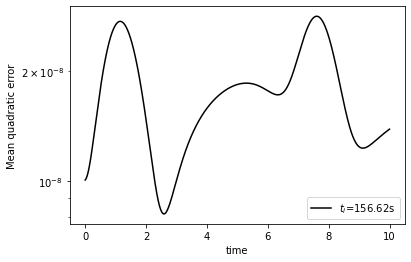

In [10]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(1, 1, 1)
plt.plot(valh,arrayerr2,'k',label='$t_i$=156.62s')
plt.xlabel('time')
plt.ylabel('Mean quadratic error')
ax3.set_yscale('log')
plt.legend()
plt.show

In [11]:
h=0.001
t3=209.82
tmax3=t3+10
x3=-0.5032618102223279
y3=-0.24346658976254046
z3=1.2499079842422562
r3t=np.array([x3,y3,z3])
valx3t=[x3]
valy3t=[y3]
valz3t=[z3]
h0=0
valh=[h0]
while (t3<tmax3):
    tc=t3
    k1=model(r3t,tc)
    k2=model(r3t+0.5*h*k1,tc)
    k3=model(r3t+0.5*h*k2,tc)
    k4=model(r3t+k3*h,tc)
    
    r3t=r3t+(1.0/6)*h*(k1+2*k2+2*k3+k4)
    valx3t.append(r3t[0])
    valy3t.append(r3t[1])
    valz3t.append(r3t[2])
    h0=h0+h
    valh.append(h0)
    t3=t3+h

result3x=[]
result3y=[]
result3z=[]
for i in range(nerr):
    t3=209.82
    tmax3=t3+10
    xi3=x3+np.random.uniform(-1e-8,1e-8)
    yi3=y3+np.random.uniform(-1e-8,1e-8)
    zi3=z3+np.random.uniform(-1e-8,1e-8)
    valx3=[xi3]
    valy3=[yi3]
    valz3=[zi3]
    r3=np.array([xi3,yi3,zi3])
    h0=0
    valh=[h0]
    while (t3<tmax3):
        tc=t3
        k1=model(r3,tc)
        k2=model(r3+0.5*h*k1,tc)
        k3=model(r3+0.5*h*k2,tc)
        k4=model(r3+k3*h,tc)
    
        r3=r3+(1.0/6)*h*(k1+2*k2+2*k3+k4)
        valx3.append(r3[0])
        valy3.append(r3[1])
        valz3.append(r3[2])
        h0=h0+h
        valh.append(h0)
        t3=t3+h 
    result3x.append(valx3)
    result3y.append(valy3)
    result3z.append(valz3)
    
arrayerr3=np.zeros(len(result3x[0]))
for t in range (len(result3x[0])):
    toterr=0
    for i in range (nerr):
        errsq=(valx3t[t]-result3x[i][t])**2+(valy3t[t]-result3y[i][t])**2+(valz3t[t]-result3z[i][t])**2
        toterr=toterr+errsq
    sqrt=np.sqrt(toterr/nerr)
    arrayerr3[t]=sqrt
    


<function matplotlib.pyplot.show(*args, **kw)>

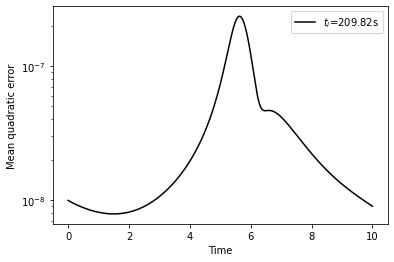

In [12]:
fig5=plt.figure()
ax5 = fig5.add_subplot(1, 1, 1)
plt.plot(valh,arrayerr3,'k',label='$t_i$=209.82s')
plt.xlabel('Time')
plt.ylabel('Mean quadratic error')
ax5.set_yscale('log')
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

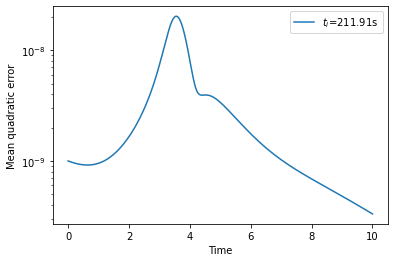

In [14]:
h=0.001
t4=211.91
tmax4=t4+10
x4=-0.3236937249460866
y4=-0.09173217585075805
z4=1.0022915245785422
r4t=np.array([x4,y4,z4])
valx4t=[x4]
valy4t=[y4]
valz4t=[z4]
h0=0
valh=[h0]
while (t4<tmax4):
    tc=t4
    k1=model(r4t,tc)
    k2=model(r4t+0.5*h*k1,tc)
    k3=model(r4t+0.5*h*k2,tc)
    k4=model(r4t+k3*h,tc)
    
    r4t=r4t+(1.0/6)*h*(k1+2*k2+2*k3+k4)
    valx4t.append(r4t[0])
    valy4t.append(r4t[1])
    valz4t.append(r4t[2])
    h0=h0+h
    valh.append(h0)
    t4=t4+h

result4x=[]
result4y=[]
result4z=[]
for i in range(nerr):
    t4=211.91
    tmax4=t4+10
    xi4=x4+np.random.uniform(-1e-8,1e-8)
    yi4=y4+np.random.uniform(-1e-8,1e-8)
    zi4=z4+np.random.uniform(-1e-8,1e-8)
    valx4=[xi4]
    valy4=[yi4]
    valz4=[zi4]
    r4=np.array([xi4,yi4,zi4])
    h0=0
    valh=[h0]
    while (t4<tmax4):
        tc=t4
        k1=model(r4,tc)
        k2=model(r4+0.5*h*k1,tc)
        k3=model(r4+0.5*h*k2,tc)
        k4=model(r4+k3*h,tc)

        r4=r4+(1.0/6)*h*(k1+2*k2+2*k3+k4)
        valx4.append(r4[0])
        valy4.append(r4[1])
        valz4.append(r4[2])
        h0=h0+h
        valh.append(h0)
        t4=t4+h
    result4x.append(valx4)
    result4y.append(valy4)
    result4z.append(valz4)

arrayerr4=np.zeros(len(result4x[0]))
for t in range (len(result4x[0])):
    toterr=0
    for i in range (nerr):
        errsq=(result4x[i][t]-valx4t[t])**2+(valy4t[t]-result4y[i][t])**2+(valz4t[t]-result4z[i][t])**2
        toterr=toterr+errsq
    sqrt=np.sqrt(toterr)
    arrayerr4[t]=sqrt/nerr
    
fig7=plt.figure()
ax7 = fig7.add_subplot(1, 1, 1)
plt.plot(valh,arrayerr4,label='$t_i$=211.91s')
plt.xlabel('Time')
plt.ylabel('Mean quadratic error')
ax7.set_yscale('log')
plt.legend()
plt.show


10001
10001


<IPython.core.display.Javascript object>


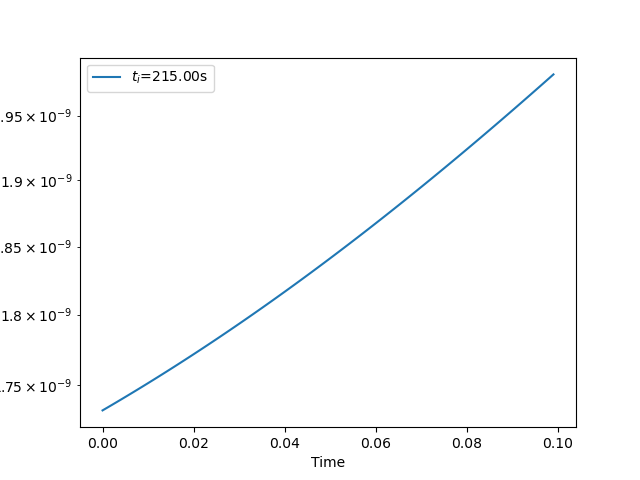

<function matplotlib.pyplot.show(*args, **kw)>

In [27]:
h=0.001
t5=215
tmax5=t5+10
x5=-1.1383232841916238 
y5=-0.06064051282549149 
z5=0.8351242362731193
r5t=np.array([x5,y5,z5])
valx5t=[x5]
valy5t=[y5]
valz5t=[z5]
h0=0
valh=[h0]
while (t5<tmax5):
    tc=t5
    k1=model(r5t,tc)
    k2=model(r5t+0.5*h*k1,tc)
    k3=model(r5t+0.5*h*k2,tc)
    k4=model(r5t+k3*h,tc)
    
    r5t=r5t+(1.0/6)*h*(k1+2*k2+2*k3+k4)
    valx5t.append(r5t[0])
    valy5t.append(r5t[1])
    valz5t.append(r5t[2])
    h0=h0+h
    valh.append(h0)
    t5=t5+h

resultx5=[]
resulty5=[]
resultz5=[]
for i in range(nerr):
    t5=215
    tmax5=t5+10
    
    xi5=x5+np.random.uniform(-1e-8,-1e-8)
    yi5=y5+np.random.uniform(-1e-8,-1e-8)
    zi5=z5+np.random.uniform(-1e-8,-1e-8)
    valx5=[xi5]
    valy5=[yi5]
    valz5=[zi5]
    valt5=[t5]
    r5=np.array([xi5,yi5,zi5])
    h0=0
    valh=[h0]
    while (t5<tmax5):
        tc=t5
        k1=model(r5,tc)
        k2=model(r5+0.5*h*k1,tc)
        k3=model(r5+0.5*h*k2,tc)
        k4=model(r5+k3*h,tc)
    
        r5=r5+(1.0/6)*h*(k1+2*k2+2*k3+k4)
        valx5.append(r5[0])
        valy5.append(r5[1])
        valz5.append(r5[2])
        h0=h0+h
        valh.append(h0)
        t5=t5+h 
    resultx5.append(valx5)
    resulty5.append(valy5)
    resultz5.append(valz5)
print (len(resulty5[0]))
print (len(valy5t))
arrayerr5=np.zeros(len(resultx5[0]))
for t in range (len(resultx5[0])):
    toterr=0
    for i in range (nerr):
        errsq=(resultx5[i][t]-valx5t[t])**2+(valy5t[t]-resulty5[i][t])**2+(valz5t[t]-resultz5[i][t])**2
        toterr=toterr+errsq
    sqrt=np.sqrt(toterr)
    arrayerr5[t]=sqrt/nerr
    

fig9=plt.figure()
ax9 = fig9.add_subplot(1, 1, 1)
plt.plot(valh,arrayerr5,label='$t_i$=215.00s')
plt.xlabel('Time')
plt.ylabel('Mean quadratic error')
ax9.set_yscale('log')
plt.legend()
plt.show

In [33]:
h=0.001
t6=386.53
tmax6=t6+10
x6=-1.902085458186659  
y6=-0.6682481521786103
z6=1.5719064219604757
r6t=np.array([x6,y6,z6])
valx6t=[x6]
valy6t=[y6]
valz6t=[z6]
h0=0
valh=[h0]
while (t6<tmax6):
    tc=t6
    k1=model(r6t,tc)
    k2=model(r6t+0.5*h*k1,tc)
    k3=model(r6t+0.5*h*k2,tc)
    k4=model(r6t+k3*h,tc)
    
    r6t=r6t+(1.0/6)*h*(k1+2*k2+2*k3+k4)
    valx6t.append(r6t[0])
    valy6t.append(r6t[1])
    valz6t.append(r6t[2])
    h0=h0+h
    valh.append(h0)
    t6=t6+h 
result6x=[]
result6y=[]
result6z=[]
for i in range(nerr):
    t6=386.53
    tmax6=t6+10
    valt6=[t6]
    xi6=x6+np.random.uniform(-1e-8,1e-8)
    yi6=y6+np.random.uniform(-1e-8,1e-8)
    zi6=z6+np.random.uniform(-1e-8,1e-8)
    valx6=[xi6]
    valy6=[yi6]
    valz6=[zi6]
    r6=np.array([xi6,yi6,zi6])
    while (t6<tmax6):
        tc=t6
        k1=model(r6,tc)
        k2=model(r6+0.5*h*k1,tc)
        k3=model(r6+0.5*h*k2,tc)
        k4=model(r6+k3*h,tc)
    
        r6=r6+(1.0/6)*h*(k1+2*k2+2*k3+k4)
        valx6.append(r6[0])
        valy6.append(r6[1])
        valz6.append(r6[2])
        t6=t6+h
        valt6.append(t6) 
    result6x.append(valx6)
    result6y.append(valy6)
    result6z.append(valz6)
    

arrayerr6=np.zeros(len(result6x[0]))
for t in range (len(result6x[0])):
    toterr=0
    for i in range (nerr):
        errsq=(result6x[i][t]-valx6t[t])**2+(valy6t[t]-result6y[i][t])**2+(valz6t[t]-result6z[i][t])**2
        toterr=toterr+errsq
    sqrt=np.sqrt(toterr/nerr)
    arrayerr6[t]=sqrt
    


<IPython.core.display.Javascript object>


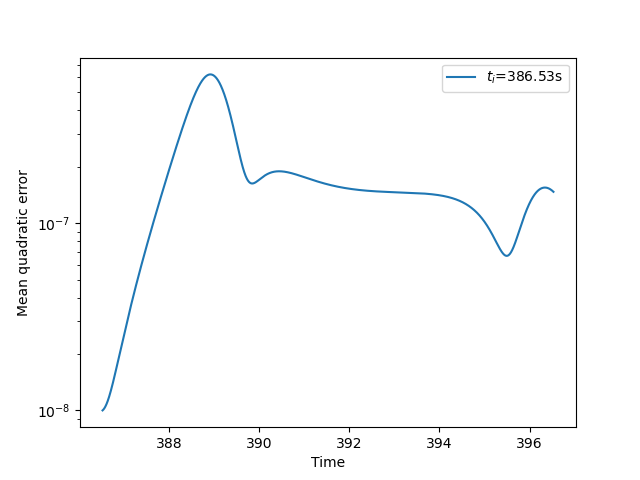

<function matplotlib.pyplot.show(*args, **kw)>

In [34]:
fig12=plt.figure()
ax12 = fig12.add_subplot(1, 1, 1)
plt.plot(valt6,arrayerr6,label='$t_i$=386.53s')
plt.xlabel('Time')
plt.ylabel('Mean quadratic error')
ax12.set_yscale('log')
plt.legend()
plt.show

<IPython.core.display.Javascript object>


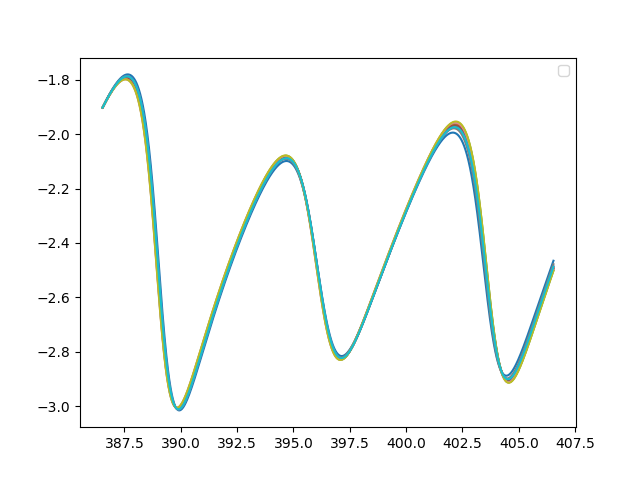

No handles with labels found to put in legend.


In [60]:
%matplotlib notebook
fig13 = plt.figure()
for i in range(10):
    plt.plot(valt6, result6[i])
plt.legend()

plt.show()

In [44]:
t7=389.33
tmax7=t7+10

x7=-2.828246654147495
y7=-0.6378069202627101
z7=1.5069025003586884

r7t=np.array([x7,y7,z7])
valx7t=[x7]
valy7t=[y7]
valz7t=[z7]
h0=0
valh=[h0]
while (t7<tmax7):
    tc=t7
    k1=model(r7t,tc)
    k2=model(r7t+0.5*h*k1,tc)
    k3=model(r7t+0.5*h*k2,tc)
    k4=model(r7t+k3*h,tc)
    
    r7t=r7t+(1.0/6)*h*(k1+2*k2+2*k3+k4)
    valx7t.append(r7t[0])
    valy7t.append(r7t[1])
    valz7t.append(r7t[2])
    h0=h0+h
    valh.append(h0)
    t7=t7+h
result7x=[]
result7y=[]
result7z=[]
for i in range(nerr):
    t7=389.33
    tmax=t7+10
    valt7=[t7]
    xi7=x7+np.random.uniform(-1e-8,1e-8)
    yi7=y7+np.random.uniform(-1e-8,1e-8)
    zi7=z7+np.random.uniform(-1e-8,1e-8)
    valx7=[xi7]
    valy7=[yi7]
    valz7=[zi7]
    r7=np.array([xi7,yi7,zi7])
    h0=0
    while (t7<tmax7):
        tc=t7
        k1=model(r7,tc)
        k2=model(r7+0.5*h*k1,tc)
        k3=model(r7+0.5*h*k2,tc)
        k4=model(r7+k3*h,tc)
    
        r7=r7+(1.0/6)*h*(k1+2*k2+2*k3+k4)
        valx7.append(r7[0])
        valy7.append(r7[1])
        valz7.append(r7[2])
        t7=t7+h
        valt7.append(t7) 
    result7x.append(valx7)
    result7y.append(valy7)
    result7z.append(valz7)
print(len(result7y[0]))
print(len(valy7t))
arrayerr7=np.zeros(len(result7x[0]))
for t in range (len(result7x[0])):
    toterr=0
    for i in range (nerr):
        errsq=(result7x[i][t]-valx7t[t])**2+(valy7t[t]-result7y[i][t])**2+(valz7t[t]-result7z[i][t])**2
        toterr=toterr+errsq
    sqrt=np.sqrt(toterr/nerr)
    arrayerr7[t]=sqrt
    


10002
10002


<IPython.core.display.Javascript object>


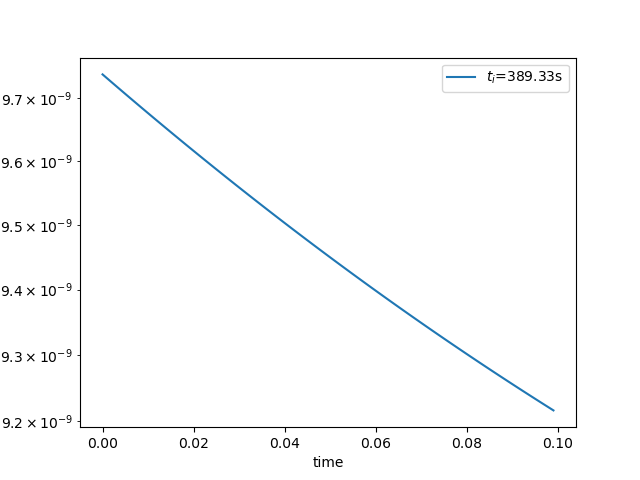

<function matplotlib.pyplot.show(*args, **kw)>

In [42]:
fig14=plt.figure()
ax14 = fig14.add_subplot(1, 1, 1)
plt.plot(valh[0:100],arrayerr7[0:100],label='$t_i$=389.33s')
plt.xlabel('time')
plt.ylabel('Mean quadratic error')
ax14.set_yscale('log')
plt.legend()
plt.show

In [15]:
t8=176.40
tmax8=t8+10

x8=-1.9820939069179084
y8=-0.7152379967835283
z8=1.5944366474577152

r8t=np.array([x8,y8,z8])
valx8t=[x8]
valy8t=[y8]
valz8t=[z8]
h0=0
valh=[h0]
while (t8<tmax8):
    tc=t8
    k1=model(r8t,tc)
    k2=model(r8t+0.5*h*k1,tc)
    k3=model(r8t+0.5*h*k2,tc)
    k4=model(r8t+k3*h,tc)
    
    r8t=r8t+(1.0/6)*h*(k1+2*k2+2*k3+k4)
    valx8t.append(r8t[0])
    valy8t.append(r8t[1])
    valz8t.append(r8t[2])
    h0=h0+h
    valh.append(h0)
    t8=t8+h
result8x=[]
result8y=[]
result8z=[]
for i in range(nerr):
    t8=176.40
    tmax=t8+10
    valt8=[t8]
    xi8=x8+np.random.uniform(-1e-8,1e-8)
    yi8=y8+np.random.uniform(-1e-8,1e-8)
    zi8=z8+np.random.uniform(-1e-8,1e-8)
    valx8=[xi8]
    valy8=[yi8]
    valz8=[zi8]
    r8=np.array([xi8,yi8,zi8])
    h0=0
    while (t8<tmax8):
        tc=t8
        k1=model(r8,tc)
        k2=model(r8+0.5*h*k1,tc)
        k3=model(r8+0.5*h*k2,tc)
        k4=model(r8+k3*h,tc)
    
        r8=r8+(1.0/6)*h*(k1+2*k2+2*k3+k4)
        valx8.append(r8[0])
        valy8.append(r8[1])
        valz8.append(r8[2])
        t8=t8+h
        valt8.append(t8) 
    result8x.append(valx8)
    result8y.append(valy8)
    result8z.append(valz8)
print(len(result8y[0]))
print(len(valy8t))
arrayerr8=np.zeros(len(result8x[0]))
for t in range (len(result8x[0])):
    toterr=0
    for i in range (nerr):
        errsq=(result8x[i][t]-valx8t[t])**2+(valy8t[t]-result8y[i][t])**2+(valz8t[t]-result8z[i][t])**2
        toterr=toterr+errsq
    sqrt=np.sqrt(toterr/nerr)
    arrayerr8[t]=sqrt
    


10001
10001


<function matplotlib.pyplot.show(*args, **kw)>

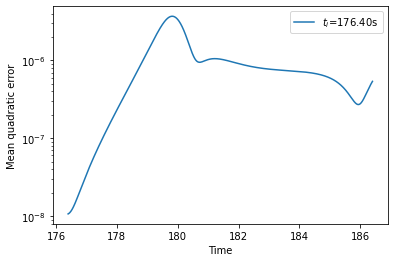

In [16]:
fig16=plt.figure()
ax16 = fig16.add_subplot(1, 1, 1)
plt.plot(valt8,arrayerr8,label='$t_i$=176.40s')
plt.xlabel('Time')
plt.ylabel('Mean quadratic error')
ax16.set_yscale('log')
plt.legend()
plt.show

<IPython.core.display.Javascript object>


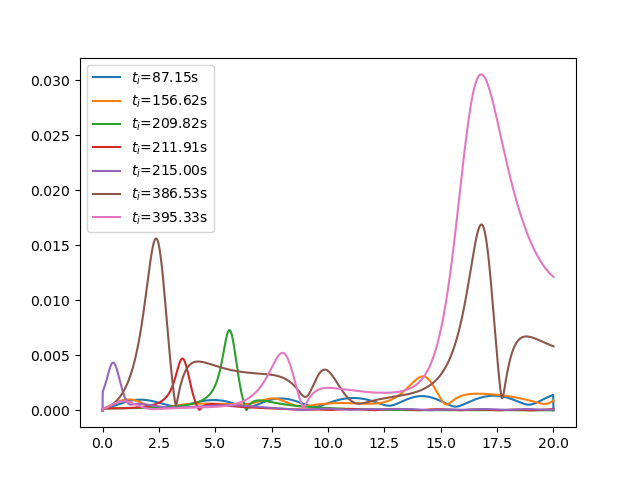

<function matplotlib.pyplot.show(*args, **kw)>

In [106]:
fig16=plt.figure()
plt.plot(hval,arrayerr1,label='$t_i$=87.15s')
plt.plot(hval,arrayerr2,label='$t_i$=156.62s')
plt.plot(hval,arrayerr3,label='$t_i$=209.82s')
plt.plot(hval,arrayerr4,label='$t_i$=211.91s')
plt.plot(hval,arrayerr5,label='$t_i$=215.00s')
plt.plot(hval,arrayerr6,label='$t_i$=386.53s')
plt.plot(hval,arrayerr7,label='$t_i$=395.33s')
plt.legend()
plt.show